<a href="https://colab.research.google.com/github/x3gan/elte-msc/blob/main/Python_Fundamentals_25_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python Fundamentals**

<div style="border: 3px solid #222; padding: 16px; border-radius: 10px; background-color: #1c1f26; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; color: #e0e0e0;">
  <div style="display: flex; align-items: center; gap: 8px; margin-top: 12px;">
    <span style="font-size: 24px; color: #ff5555;">&#128274;</span>
    <span style="font-size: 16px;"><strong>Project:</strong> Introduction</span>
  </div>
  <div style="display: flex; align-items: center; gap: 8px; margin-top: 8px;">
    <span style="font-size: 20px; color: #ff5555;">&#128218;</span>
    <span style="font-size: 16px;"><strong>Course:</strong> Deep Network Development</span>
  </div>
  <div style="margin-top: 12px; font-size: 14px;">
    <span style="font-size: 18px; color: #6e8192;">&#128100;</span>
    <span style="font-weight: bold;"><strong>Authors:</strong></span> Tamás Takács, Imre Molnár (PhD students, Department of Artificial Intelligence, Eötvös Loránd University)
  </div>
</div>
<hr style="border: none; border-top: 2px solid #444;">
<br>

<img src="https://i.ibb.co/0y7tXCCg/python-googlecolab-featuredimage-1.png" alt="python-googlecolab-featuredimage-1" border="0">

This notebook provides a comprehensive overview of `Python fundamentals`, covering topics such as defining functions (with return values, optional parameters, recursion, nested functions, and lambda expressions), as well as techniques for passing functions as arguments. It also explores essential data structures like `tuples, sets, and dictionaries, shows data manipulation using list, set, and dictionary` comprehensions, and introduces error handling with assertions.

In [ ]:
# @title Roadmap Generator for Python Fundamentals
%%capture flowchart_output
from graphviz import Digraph

def create_python_fundamentals_flowchart(output_filename='python_fundamentals_flowchart'):
    dot = Digraph(name='PythonFundamentals', format='png')
    dot.attr(rankdir='LR')  # Left-to-right layout
    dot.attr('node', shape='box', style='filled', fontsize='12', fontname='Arial')

    # Grouped topics with a newline before the difficulty level
    dot.node('Functions', 'Functions & Lambdas\n(Easy)', fillcolor='#A0E7A0')
    dot.node('DataStruct', 'Data Structures & Comprehensions\n(Moderate)', fillcolor='#F6D49A')
    dot.node('BuiltIns', 'Built-in Functions & Error Handling\n(Easy)', fillcolor='#A0E7A0')
    dot.node('Classes', 'Classes & OOP\n(Moderate)', fillcolor='#F6D49A')
    dot.node('Iterators', 'Iterators & Generators\n(Moderate)', fillcolor='#F6A0A0')

    # Define the sequential flow between nodes
    dot.edge('Functions', 'DataStruct')
    dot.edge('DataStruct', 'BuiltIns')
    dot.edge('BuiltIns', 'Classes')
    dot.edge('Classes', 'Iterators')

    dot.render(output_filename, view=False)

create_python_fundamentals_flowchart('python_fundamentals_flowchart')


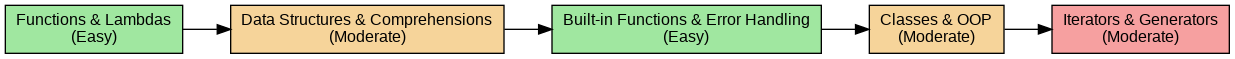

In [ ]:
from IPython.display import Image as IMG
IMG('python_fundamentals_flowchart.png')

## **Functions**

Documentation: https://docs.python.org/3.6/tutorial/controlflow.html#defining-functions - Chapters 4.6 and 4.7

### **Simple functions, `return`**

In [ ]:
def procedure1(my_param): # if no return statement, returns None in the end
    print(my_param)

def function_double(my_param): # type of 'my_param' is not restricted
    return my_param*2

def function_swap(arg1, arg2): # Multiple returns: returns a tuple with a length of 2
    return arg2, arg1

print("What do they return? ")
print("If no return statement, then returns None: ", procedure1("print this!"))
print("Return number argument*2: ", function_double(2))
print("Return string argument*2: ", function_double("two"))
print("Swap arguments: ", function_swap("first", "second"))

result = function_swap("first", "second")
print(type(result))


What do they return? 
print this!
If no return statement, then returns None:  None
Return number argument*2:  4
Return string argument*2:  twotwo
Swap arguments:  ('second', 'first')
<class 'tuple'>


### **Optional parameters**

In [ ]:
for i in range (0,10):
    print(str(i).zfill(3))

000
001
002
003
004
005
006
007
008
009


In [ ]:
def increment(n, increment_by=1):  # parameters with default values must be in the back
    return n+increment_by

print("Calling increment with one argument: ", increment(5))
print("Calling increment with two arguments: ", increment(5, 2))

def date_to_str(year, month=1, day=1):  # parameters with default values must be in the back
    return str(year) + "." + str(month).zfill(2) + "." + str(day).zfill(2)

print("\nOnly year is given: ", date_to_str(1962))
print("Year & month are given: ", date_to_str(1962, 5))
print("Year & day are given: ", date_to_str(1962, day=10))


Calling increment with one argument:  6
Calling increment with two arguments:  7

Only year is given:  1962.01.01
Year & month are given:  1962.05.01
Year & day are given:  1962.01.10


In [ ]:
def append_1(arr=[]):
    arr.append(1)
    return arr

a = [2, 3, 5]
append_1(a)

[2, 3, 5, 1]

In [ ]:
append_1()

[1]

In [ ]:
append_1()

[1, 1]

### **Recursion**

In [ ]:
def factorial(n):
    product = 1
    for i in range(1,n+1):
        product *= i
    return product

print("Factorial implemented with a loop: ", factorial(6))

def factorial_rec(n):
    if n <= 0:
        return 1
    else:
        return n*factorial_rec(n-1)

print("Factorial implemented in a recursive way: ", factorial_rec(6))

def factorial_rec2(n):
    return 1 if n <= 0 else n*factorial_rec(n-1)

print("Factorial implemented in a recursive way, shorter version: ", factorial_rec2(6))

Factorial implemented with a loop:  720
Factorial implemented in a recursive way:  720
Factorial implemented in a recursive way, shorter version:  720


### **Nested function**

In [ ]:
def absolute(x):
    def absolute_positive(x):  # functions can be defined in functions, to any level of depth
        return x

    def absolute_negative(x):
        return -x

    if x < 0:
        return absolute_negative(x)
    else:
        return absolute_positive(x)


print("Nested absolute value function: ", absolute(-3.5))
print("Nested absolute value function: ", absolute(2))



Nested absolute value function:  3.5
Nested absolute value function:  2


### **Passing function as an argument**

In [ ]:
def addition(a, b):
    return a+b

def multiplication(a, b):
    return a*b

def apply_twice(func, a, b, c):
    return func(func(a, b), c)

a = addition
print(a(3,4))
print("Applying addition() twice: ", apply_twice(addition, 2, 3, 4))
print("Applying multiplication() twice: ", apply_twice(multiplication, 2, 3, 4))
print("Applying built-in max() function twice: ", apply_twice(max, 2, 3, 4))


7
Applying addition() twice:  9
Applying multiplication() twice:  24
Applying built-in max() function twice:  4


### **Anonymous functions (`lambda`)**

In [ ]:
additionL = lambda x, y: x+y
multiplicationL = lambda x, y: x*y

apply_twiceL = lambda f, x, y, z: f(f(x, y), z)

print("Same as previous functions but defined in lambda form: ")
print(apply_twiceL(additionL, 2, 3, 4))
print(apply_twiceL(multiplicationL, 2, 3, 4))
print(apply_twiceL(max, 2, 3, 4))

print("\nNegate: ", lambda x: -x(5.3))

Same as previous functions but defined in lambda form: 
9
24
4

Negate:  <function <lambda> at 0x000001F31A044B80>


## **Data structures**

We discussed the `list` type in the previous chapter.

We will discuss the `tuple`, `set`, `dict` types below.

Documentation: https://docs.python.org/3.6/tutorial/datastructures.html

Other built-in container types can be found in the `collections` module: https://docs.python.org/3/library/collections.html



 ### **`tuple` type**

Immutable type (its state cannot be modified after it's created).

In [ ]:
print("Tuples:")

t1 = (2,3,"a",(4,5))
t2 = ("abc",)   # tuple with a length of 1: a comma is needed
not_a_tuple = ("abc")    # NOT a tuple, but a string in a pair of parentheses
t3 = ()    # zero length tuple

print("A tuple with four elements: ", t1)
print("A tuple with a single element: ", t2)
print("This is not a tuple: ", not_a_tuple)
print("A zero length tuple: ", t3)

# Invalid operation: t1[0] = 1  -> 'TypeError: 'tuple' object does not support item assignment'
#    -> tuple is IMMUTABLE, it cannot be changed after creation

t4 = (2,3,[],t2)
print("\nThe tuple: ", t4)
t4[2].append(1) # the 2. elements is a list it can changed but the elements can be changed
t4[2].append("abc") #
t4[2].remove(1)
t4[2].insert(0,0)
print("Adding/removing/inserting an element to the list inside the tuple: ", t4)


Tuples:
A tuple with four elements:  (2, 3, 'a', (4, 5))
A tuple with a single element:  ('abc',)
This is not a tuple:  abc
A zero length tuple:  ()

The tuple:  (2, 3, [], ('abc',))
Adding/removing/inserting an element to the list inside the tuple:  (2, 3, [0, 'abc'], ('abc',))


### **Packing and unpacking tuples**

In [ ]:
# t5 = 1, 2, "asd", [34,54], (2,(1,))
# print("Packed 5 elements into a tuple: ", t5)

def func_swap(x, y):
  return y, x

t6 = func_swap(2,7)
print("\nThe function returned two elements which were automatically packed into a tuple: ", t6)

aa, bb = func_swap(3,8)
print("The function returned two elements which were put in two separate variables: ")
print("    ", aa)
print("    ", bb)

a1, b1 = t6
print("\nUnpacked a 2 long tuple into two variables: ")
print("    ", a1)
print("    ", b1)

print("\nLength of a tuple: ", len(t6))

print("\nIterating a tuple the same way as a list: ")
for item in t6:
  print("    ", item)


The function returned two elements which were automatically packed into a tuple:  (7, 2)
The function returned two elements which were put in two separate variables: 
     8
     3

Unpacked a 2 long tuple into two variables: 
     7
     2

Length of a tuple:  2

Iterating a tuple the same way as a list: 
     7
     2


In [ ]:
my_list = ['abc', -1.5, [None]]
a1, a2, a3 = my_list
print("Any sequence can be unpacked this way (if length is known), not only a tuple: ")
print("    ", a1)
print("    ", a2)
print("    ", a3)

Any sequence can be unpacked this way (if length is known), not only a tuple: 
     abc
     -1.5
     [None]


If we want to pass the elements of a tuple when calling a function as different arguments of that function then the **unpack operator** might help.

More details at https://realpython.com/python-kwargs-and-args/

### **`set` type**

In a set, every element appears once. It can contain mixed types of objects as well but only immutable ones (such as numbers, strings, NoneType, tuple, ...).

Checking if a set contains an element by the implementation of a hash function has a time complexity of **O(1)**. This same operation on a list would have a time of **O(n)**.

In [ ]:
print("Set objects: ")

# s1 = {}  # -> this creates an empty dict object, not an empty set
s1 = set()  # to create an empty set, the constructor must be used
print("An empty set: ", s1)

s2 = {1,2,3,2,("a",),1,None,3,3,None,3,"adab",("a",),"a"}
print("Duplicate elements are stored once in the set: ", s2)

# s3 = {2, [2]}: 'TypeError: unhashable type: 'list'' -> only immutable types can be put in a set.

list1 = [7,1,1,1,2,5,7,8]
tup1 = (3,1,1,2,2,3,3)
str1 = "abcabd"
s6 = set(list1)
s7 = set(tup1)
s8 = set(str1)

print("\nA set constructed from a list: ", s6)
print('A set constructed from a tuple: ', s7)
print('A set constructed from the characters of a string (as string is iterable): ', s8)

# NO GUARANTEE about the order of iteration!


Set objects: 
An empty set:  set()
Duplicate elements are stored once in the set:  {1, 'adab', 3, 2, ('a',), 'a', None}

A set constructed from a list:  {1, 2, 5, 7, 8}
A set constructed from a tuple:  {1, 2, 3}
A set constructed from the characters of a string (as string is iterable):  {'c', 'a', 'd', 'b'}


### **Set operations**

In [ ]:
print("Length of a set: ", len(s2))

# It is much faster to check a large set for an element than to check a list
print("Is 'adab' in the set? ", 'adab' in s2)
print("Is 'adab' not in the set? ", 'adab' not in s2)   # 'not in' is a single operator!
print("Is 'asd' in the set? ", 'asd' in s2)

print('\nUnion: ', s6 | s7)
print('Intersection: ', s6 & s7)
print('Symmetric difference (items present in exactly one set): ', s6 ^ s7)
print('Subtraction (tems in set#1 that are not in set#2)', s6 - s7)

print("\nModifying a set: ")
print("The set: ", s6)
s6.add('adab')
print("The set after 'adab' was added: ", s6)
s6.add(1)  # already present, not added
print("The set after 1 was added (unchanged since 1 was already in the set): ", s6)
s6.remove('adab')
print("The set after 'adab' was removed: ", s6)
s6.update(['23', 23, 23, (23,)])   # adding all elements from a list, set, or other sequence
print("The set after adding multiple elements: ", s6)

print("\nIterating a set, order is not guaranteed:")
for my_item in s8:
    print('    ', my_item)


Length of a set:  7
Is 'adab' in the set?  True
Is 'adab' not in the set?  False
Is 'asd' in the set?  False

Union:  {1, 2, 3, 5, 7, 8}
Intersection:  {1, 2}
Symmetric difference (items present in exactly one set):  {3, 5, 7, 8}
Subtraction (tems in set#1 that are not in set#2) {8, 5, 7}

Modifying a set: 
The set:  {1, 2, 5, 7, 8}
The set after 'adab' was added:  {1, 2, 'adab', 5, 7, 8}
The set after 1 was added (unchanged since 1 was already in the set):  {1, 2, 'adab', 5, 7, 8}
The set after 'adab' was removed:  {1, 2, 5, 7, 8}
The set after adding multiple elements:  {1, 2, 5, 7, 8, '23', (23,), 23}

Iterating a set, order is not guaranteed:
     c
     a
     d
     b


In [ ]:
test_set = {"a","b","c","d","e",1,"f",2,"g",3,"h"}
test_set

{1, 2, 3, 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'}

### **`dict` type: dictionary (not only for words...)**

Associates unique keys to values. It is best to think of it as a set of key-value pairs, where the keys must be unique. Keys can only be of an immutable type (for hashing purposes).

In [ ]:
dict1 = {}   # an empty dictionary
dict2 = {1:['bla','bla'], 'asd':['blab'], ():[123, 456], (1,2,3):2}   # keys and values of different type are possible

print("An empty dictionary: ", dict1)
print("A dictionary: ", dict2)

print("An iterator over the keys of the dictionary: ", dict2.keys())
print("An iterator over the values of the dictionary: ", dict2.values())
print("An iterator over the (key, value) pairs of the dictionary: ", dict2.items())

dict4 = {'John':25, 'Eliza':32, 'Sam':59}
print("\nIteration through keys, order is not guaranteed:")
for key in dict4:
  print('    ', key)

print("\nIteration through (key, value) pairs, order is not guaranteed:")
for key, value in dict4.items():   # <-- unpacking (key, value) tuple into two variables
  print("\t", key, " -> ", value)


An empty dictionary:  {}
A dictionary:  {1: ['bla', 'bla'], 'asd': ['blab'], (): [123, 456], (1, 2, 3): 2}
An iterator over the keys of the dictionary:  dict_keys([1, 'asd', (), (1, 2, 3)])
An iterator over the values of the dictionary:  dict_values([['bla', 'bla'], ['blab'], [123, 456], 2])
An iterator over the (key, value) pairs of the dictionary:  dict_items([(1, ['bla', 'bla']), ('asd', ['blab']), ((), [123, 456]), ((1, 2, 3), 2)])

Iteration through keys, order is not guaranteed:
     John
     Eliza
     Sam

Iteration through (key, value) pairs, order is not guaranteed:
	 John  ->  25
	 Eliza  ->  32
	 Sam  ->  59


Dictionary operations

In [ ]:
print("Length of dict: ", len(dict4))
print("Get value for key 'John' from dict: ", dict4['John'])

print("Is 'Mary' among the dict keys? ", 'Mary' in dict4)
print("Is 'Eliza' not among the dict keys? ", "Eliza" not in dict4)

# modified the value of a key in dict
dict4['John'] += 10
print("\nIncrease value for key 'John' by 10: ", dict4)

# added new key (and value) to dict
dict4['Robert'] = 1
print("Added a new key to the dict with a value of 1: ", dict4)

# deleting key-value pair:
del dict4['John']     # the del statement is used for deletion of variables as well, we will discuss this later
print("Deleted 'John' from the dict: ", dict4)

# adding all elements of a dict to another one:
dict4.update(dict2)   # if keys are present in both dicts, the corresponding value in dict2 overwrites the value in dict4
print("Added all elements from another dict (values for existing keys were overwritten: ", dict4)

# !!! ORDER OF ITERAION through the dict items is NOT guaranteed to be either sorted by
#          keys or values or by item insertion date
# however, OrderedDict from collections module guarantees iteration order
#          to be the same as the order of item insertions to the OrderedDict



Length of dict:  3
Get value for key 'John' from dict:  25
Is 'Mary' among the dict keys?  False
Is 'Eliza' not among the dict keys?  False

Increase value for key 'John' by 10:  {'John': 35, 'Eliza': 32, 'Sam': 59}
Added a new key to the dict with a value of 1:  {'John': 35, 'Eliza': 32, 'Sam': 59, 'Robert': 1}
Deleted 'John' from the dict:  {'Eliza': 32, 'Sam': 59, 'Robert': 1}
Added all elements from another dict (values for existing keys were overwritten:  {'Eliza': 32, 'Sam': 59, 'Robert': 1, 1: ['bla', 'bla'], 'asd': ['blab'], (): [123, 456], (1, 2, 3): 2}


## **Important built-in functions**

### **The `enumerate()` function**

Iterates through a sequence returning the elements and their indexes in order.

In [ ]:
print('Iterating a sequence, but together with each element the index is given:')
for idx, item in enumerate(['bla', 'asd', None]):
  print('    at idx#', idx, ': ', item)

Iterating a sequence, but together with each element the index is given:
    at idx# 0 :  bla
    at idx# 1 :  asd
    at idx# 2 :  None


### **The `zip()` function**

Creates a sequence of pairs by aggregating two sequences (list, iterator, etc.). Its result is an iterator.

In [ ]:
list1 = ["Eliza", "John", "Mary"]
list2 = [35, 26, 17]

print("Iterating through the zipped lists (each element is a 2 long tuple): ")
for pair in zip(list1, list2):
  print('    ', pair)

my_dict = dict(zip(list1, list2))
print("\nA dict is constructed from the two zipped lists: ", my_dict)

Iterating through the zipped lists (each element is a 2 long tuple): 
     ('Eliza', 35)
     ('John', 26)
     ('Mary', 17)

A dict is constructed from the two zipped lists:  {'Eliza': 35, 'John': 26, 'Mary': 17}


### **The `min(), max(), abs(), round(), all(), any()` functions**

In [ ]:
my_list2 = [15, 25, 1.26, -56, 2., .3]
print("The minimum of a sequence: ", min(my_list2))
print("The maximum of a range iterator: ", max(range(3,11)))

print("\n1.5 rounded: ", round(1.5))

my_bools = [2 < 3, 4 < 5 <= 1, True]
print("\nA sequence of boolean expressions: ", my_bools)
print("Logical AND operator applied to a sequence of boolean expressions: ", all(my_bools))
print("Logical OR operator applied to a sequence of boolean expressions: ", any(my_bools))


The minimum of a sequence:  -56
The maximum of a range iterator:  10

1.5 rounded:  2

A sequence of boolean expressions:  [True, False, True]
Logical AND operator applied to a sequence of boolean expressions:  False
Logical OR operator applied to a sequence of boolean expressions:  True


### **The `map()` and `filter()` functions**

`map()`: applies a function to all elements of a sequence

`filter()`: selects the elements of a sequence for which the given function returns true

In [ ]:
my_list = [1,2,3]
my_doubled_sequence = map(lambda x: 2*x, my_list)  # named functions can be given as well
print("Iterate my doubled sequence:")
for item in my_doubled_sequence:
  print('    ', item)

print("\nThe iterators can be converted into lists: ", list(map(lambda x: 2*x, my_list)))

filtered_sequence = filter(lambda x: x > 2, my_list)  # only keep elements greater than 2
print("Convert the filtered sequence iterator into a list: ", list(filtered_sequence))

Iterate my doubled sequence:
     2
     4
     6

The iterators can be converted into lists:  [2, 4, 6]
Convert the filtered sequence iterator into a list:  [3]


## **Classes**

The concept of classes appears in many programming languages, in most cases as part of the object-oriented programming paradigm.

In an ideal case, a class contains the required fields and the methods for defining the behaviour of one implemented data structure or functionality. This way by initializing the class we get one instance of the object.

As an example, we can take a class that represents a car. The class is the prototype of the car as a concept. The instance is a concrete materialization of the car's prototype, meaning that it can be managed as a physical car (e.g.: Lazlo's car). The fields of the car class are the car's attributes, such as its current speed, weight, number of seats, number of passengers, etc. By creating an instance these fields get values, just how a real car has a speed that can be described by a number, has a weight and a number of seats and passengers. The current values of these fields make up the object's state. The methods of the car class used on the concrete instance can change the values of the fields (and thus change the state of the instance) or return them.

The documentation of advanced concepts such as inheritance, static variables/functions can be found here: https://docs.python.org/3/tutorial/classes.html

In [ ]:
class Car:

  '''
  Member fields:
    speed: float
    acceleration: float
  '''

  # the constructor: creates and initializes a new Car instance;
  # the self variable in the scope of the class points to the instance in context
  def __init__(self, acceleration):
    self.acceleration = acceleration
        # the 'acceleration' field of the instace is defined using the single constructor parameter
    self.speed = 0.   # another field is defined

    # some private fields - this is just a convention
    self._private_field1 = 2
    self.__private_field2 = 3

    # end of constructor method

  # querying speed
  def get_speed(self):
    return self.speed

  # the following member functions modify the state of the object: accelerating and braking
  def accelerate(self):
    self.speed += self.acceleration
  def brake(self):
    self.speed = max(0., self.speed - self.acceleration)

# definition of Car class ends here

print("Car race:")

suzuki_swift = Car(1.0)   # the suzuki instance is constructed with a low acceleration
porsche = Car(5.0)        # the porsche instance is constructed with a higher acceleration

print("Speed of Suzuki at the start: ", suzuki_swift.get_speed())
print("Speed of Suzuki at the start: ", porsche.get_speed())

suzuki_swift.accelerate()
suzuki_swift.accelerate()

porsche.accelerate()

print("Speed of Suzuki after accelerating twice: ", suzuki_swift.get_speed())
print("Speed of Porsche after accelerating once: ", porsche.get_speed())

suzuki_swift.brake()
print("Speed of Suzuki after braking: ", suzuki_swift.get_speed())

porsche.speed = 1000
print("\nDirectly accessing fields (not nice): ", porsche.speed)

# There are two conventions for private members (variable/function hiding):
#   one underscore in front of the member name means private by convention,
#     but accessible similarly to regular members
#   two underscore in front of the member name makes the member specific for each class,
#     such that subclasses can't overwrite it accidentally, but still accessible

print("Accessing private field with single underscore: ", porsche._private_field1)
#print(porsche.__private_field2)  # AttributeError: 'Car' object has no attribute '__private_field2'

# variables with two underscore prefixes are less straightforward to access:
print("Accessing private field with double underscore: ", porsche._Car__private_field2)


Car race:
Speed of Suzuki at the start:  0.0
Speed of Suzuki at the start:  0.0
Speed of Suzuki after accelerating twice:  2.0
Speed of Porsche after accelerating once:  5.0
Speed of Suzuki after braking:  1.0

Directly accessing fields (not nice):  1000
Accessing private field with single underscore:  2
Accessing private field with double underscore:  3


## **List, Set, Dict comprehension**

A concise one-line way of creating new lists/sets/dictionaries. Syntactic sugar.

In [ ]:
print("List comprehensions: ")
# EXAMPLE#1, LONG VERSION:

my_list = [1.2, 2.2, -3., .5, 0.]
print("\nWe will double each item in the following list: ", my_list)

new_list = []
for item in my_list:
    new_list.append(item*2)

print("The result list created with a for loop: ", new_list)

# EXAMPLE#1, SHORT VERSION:
new_list = [item*2 for item in my_list]
print("The result list created with a list comprehension: ", new_list)

# EXAMPLE#2, LONG VERSION:
print("\nWe will double each positive number, set zeros to one, ...")
print("    ... and triple all negative numbers in the following list: ", my_list)

new_list = []
for item in my_list:
    if item > 0:
        new_list.append(item*2)
    elif item == 0.:
        new_list.append(1.)
    else:
        new_list.append(item*3)

print("The result list created with a for loop: ", new_list)

# EXAMPLE#2, SHORT VERSION:
new_list = [item*2 if item > 0 else 1. if item == 0. else item*3 for item in my_list]
print("The result list created with a list comprehension: ", new_list)


List comprehensions: 

We will double each item in the following list:  [1.2, 2.2, -3.0, 0.5, 0.0]
The result list created with a for loop:  [2.4, 4.4, -6.0, 1.0, 0.0]
The result list created with a list comprehension:  [2.4, 4.4, -6.0, 1.0, 0.0]

We will double each positive number, set zeros to one, ...
    ... and triple all negative numbers in the following list:  [1.2, 2.2, -3.0, 0.5, 0.0]
The result list created with a for loop:  [2.4, 4.4, -9.0, 1.0, 1.0]
The result list created with a list comprehension:  [2.4, 4.4, -9.0, 1.0, 1.0]


In [ ]:
# WHEN USING 'IF' WITH ONLY ONE BRANCH

# EXAMPLE#1, LONG VERSION:

my_list = [1.2, -2.2, -3., .5, 0.]
print("\nWe will select each negative item and double them from the following list: ", my_list)

new_list = []
for item in my_list:
  if item < 0:
    new_list.append(item*2)

print("The result list created with a for loop: ", new_list)

# EXAMPLE#1, SHORT VERSION:
new_list = [item*2 for item in my_list if item < 0]
print("The result list created with a list comprehension: ", new_list)



We will select each negative item and double them from the following list:  [1.2, -2.2, -3.0, 0.5, 0.0]
The result list created with a for loop:  [-4.4, -6.0]
The result list created with a list comprehension:  [-4.4, -6.0]


**Two cases of using if statements in list comprehension:**
*   If the if statement has an else branch and all branches, including the else branch, add a new element to the list/set/dictionary, then inside the comprehension all cycles that contain an if statement have their **for keyword after the if/elif/else keywords** e.g.:

```
new_list = []
for item in my_list:
  if item > 0:
    new_list.append(item*2)
  else:
    new_list.append(1.)
```
Rewritten:
```
new_list = [item*2 if item > 0 else 1. for item in my_list]
```
*   If the if statement has no else branch, or not all of its branches add new elements to the list/set/dictionary, then inside the comprehension the **if keyword is after the for keyword of the cycle it is contained in**.

```
new_list = []
for item in my_list:
  if item > 0:
    new_list.append(item*2)
```
Rewritten:
```
new_list = [item*2 for item in my_list if item > 0]
```


In [ ]:

# JAGGED LISTS (lists in lists)

print("\nJagged lists:")
my_jlist = [[2,3,-8],[4,-7,2],[],[5,6,-3],[1,5]]
print("\nWe double each negative item in the following list: ", my_jlist)

# EXAMPLE#1: modify jagged list: double negative elements

# LONG VERSION:
new_list = []
for item_list in my_jlist:
  new_sublist = []
  for item in item_list:
    if item < 0:
       new_sublist.append(item*2)
    else:
       new_sublist.append(item)
  new_list.append(new_sublist)

print("The result list created with a loop: ", new_list)

# SHORT VERSION:

new_list = [[item*2 if item < 0 else item for item in sublist] for sublist in my_jlist]
print("The result list created with a (nested) list comprehension: ", new_list)

# EXAMPLE#2: jagged list to flat list
print("\nWe create a flat list of items from the following jagged list: ", my_jlist)

# LONG VERSION:
new_list = []
for item_list in my_jlist:
  for item in item_list:
    new_list.append(item)

print("The result list created with a loop: ", new_list)

# SHORT VERSION:

new_list = [item for itemlist in my_jlist for item in itemlist]
print("The result list created with list comprehension: ", new_list)



Jagged lists:

We double each negative item in the following list:  [[2, 3, -8], [4, -7, 2], [], [5, 6, -3], [1, 5]]
The result list created with a loop:  [[2, 3, -16], [4, -14, 2], [], [5, 6, -6], [1, 5]]
The result list created with a (nested) list comprehension:  [[2, 3, -16], [4, -14, 2], [], [5, 6, -6], [1, 5]]

We create a flat list of items from the following jagged list:  [[2, 3, -8], [4, -7, 2], [], [5, 6, -3], [1, 5]]
The result list created with a loop:  [2, 3, -8, 4, -7, 2, 5, 6, -3, 1, 5]
The result list created with list comprehension:  [2, 3, -8, 4, -7, 2, 5, 6, -3, 1, 5]


Set and dictionary comprehension:

In [ ]:
print("\nSet comprehension: ")

print("\nWe create a set from the absolute values of items in this list: ", new_list)
new_set = {abs(item) for item in new_list}
print("The result set created with set comprehension: ", new_set)

print("\nDict comprehension: ")

print("\nWe create a dict from item:'item' key-value pairs from this set: ", new_set)
new_dict = {k:str(k) for k in new_set} ## {1:str(1), 2:str(2),...}
print("The result dict created with dict comprehension: ", new_dict)



Set comprehension: 

We create a set from the absolute values of items in this list:  [2, 3, -8, 4, -7, 2, 5, 6, -3, 1, 5]
The result set created with set comprehension:  {1, 2, 3, 4, 5, 6, 7, 8}

Dict comprehension: 

We create a dict from item:'item' key-value pairs from this set:  {1, 2, 3, 4, 5, 6, 7, 8}
The result dict created with dict comprehension:  {1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8'}


## **Handling errors, the `assert` statement**

Error handling works in Python much like it does in, for example, C++ and Java. Documentation: https://docs.python.org/3.6/tutorial/errors.html

The `assert` keyword can be used as a debugging tool. If the statement after the `assert` keyword  does not return true, an `AssertionError` exception will be thrown.

## **Iterators and generators**

One of the tools for lazy evaluation is the iterator. The old Python version 2 has many built-in operations that return one or more lists. This is not ideal in the case when large lists need to be generated, but we only required their first few elements. In Python version 3 most of these built-in functions will return an iterator. The iterator only creates the next element if it is needed. Generators are a special type of iterator.
The following link contains some more information about generators:

https://wiki.python.org/moin/Generators


### **HOMEWORK (Optional)**

- **Exercise 1: Building a Class**  
  Create a `Book` class that includes attributes for `title`, `author`, and `year_published`. Add methods to return a formatted description of the book and to update the publication year. Then, instantiate several `Book` objects and store them in a list.

- **Exercise 2: Dictionary Manipulation**  
  Create a dictionary that maps student names to their grades. Write functions to add a new student, update an existing student’s grade, and remove a student from the dictionary. Also, write a function to calculate the average grade and identify the top-performing student.

- **Exercise 3: Working with Sets**  
  Given two lists of words that may contain duplicates, create sets to remove duplicates from each list. Then, use set operations to:
  - Find the common words (intersection) between the two lists.
  - Find all unique words (union) from both lists.

- **Exercise 4: Enum Usage**  
  Create an enum class `Days` representing the days of the week. Write a function that accepts a day (from the enum) and returns whether it is a weekday or a weekend. Demonstrate the enum by printing out the schedule for a sample week.

- **Exercise 5: Combining Data Structures**  
  Define a `Contact` class with attributes such as `name`, `phone_number`, and `email`. Use a dictionary to store multiple contacts (with the contact name as the key and the `Contact` object as the value). Implement functions to search for a contact by name, update contact information, and delete a contact.

- **Exercise 6: Creating a Library Management System**  
  Design a simple library system using classes, dictionaries, and sets. The system should:
  - Maintain a collection of books (using the `Book` class from Exercise 1).
  - Allow adding and removing books.
  - Enable searching for books by title or author.
  - Keep track of unique genres using a set.
  Implement methods to demonstrate these functionalities and print sample outputs.